In [55]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Loading Dataset

In [56]:
def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]
def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

In [57]:
et={}
ct={}
tt={}

In [58]:
def pri(s):
    ct[s]={}
    et[s]={}
    tt[s]={}
    
def pri2(s,w):
    ct[s][w]=[]
    et[s][w]=[]
    tt[s][w]=[]

    
def pri3(s,w,f,c):
    if(c==1):
        et[s][w].append(f[0])
    elif(c==2):
        ct[s][w].append(f[0])
    elif(c==3):
        tt[s][w].append(f[0])

In [59]:
s=''
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']
def readfile1(str1):
    f = open(str1, "r")
    w=0
    counter=0
    counter2=0
    for l in f.readlines():
        counter=counter+1

        if(".gxl" in l):
            for d in dt:
                if (d in l):
                    s=d
                    pri(s)
                    
            w=10
            pri2(s,w)
            counter=0
            continue
        elif("W=10F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=30
            pri2(s,w)
            counter=0
            continue

        elif("W=30F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=50
            pri2(s,w)
            counter=0
            continue
        elif("W=50F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=80
            pri2(s,w)
            counter=0
            continue
        elif("W=80F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=150
            pri2(s,w)
            counter=0
            continue
        elif("W=150F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            counter=0
            continue
        elif(w==0):
            counter=0
            continue
        
        if(s!=0 and w!=0):
            pri3(s,w,re.findall("\d+\.\d+", l),counter)



In [60]:
readfile1("./res0")

# 1st 2 graphs - Showing time of execution + processing (Non scaled) & total time

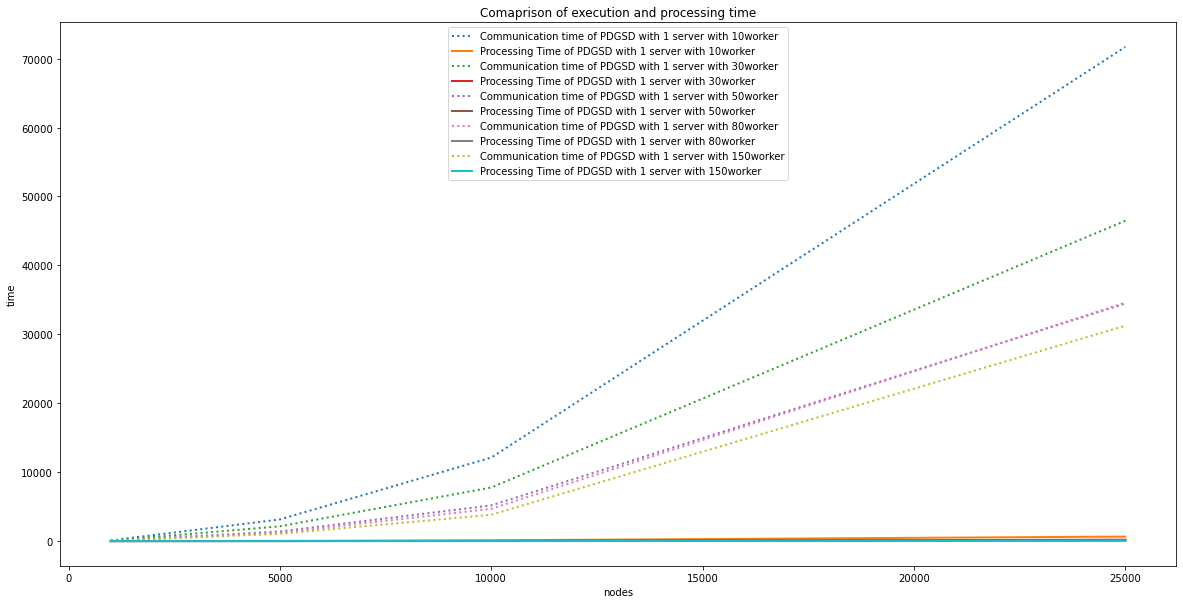

In [61]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(20,10))
dic1={}


#wc
for s in dt:
    t_v=ct[s]
    for w in workers:
        dic1[w]=dic1.get(w,[])
        dic1[w].append(float(t_v[w][0]))
dic2={}

#wc
for s in dt:
    t_v=et[s]
    for w in workers:
        dic2[w]=dic2.get(w,[])
        dic2[w].append(float(t_v[w][0]))
        
    
for s in workers:
    x='dotted'    
    plt.plot(nodes, dic1[s],linestyle=x,linewidth=2,label='Communication time of PDGSD with 1 server with '+str(s)+'worker')
    x=None
    plt.plot(nodes, dic2[s],linestyle=x,linewidth=2,label='Processing Time of PDGSD with 1 server with '+str(s)+'worker')


    


leg = plt.legend(loc='upper center')
plt.title('Comaprison of execution and processing time')
plt.xlabel('nodes')
plt.ylabel('time')
plt.show()
    

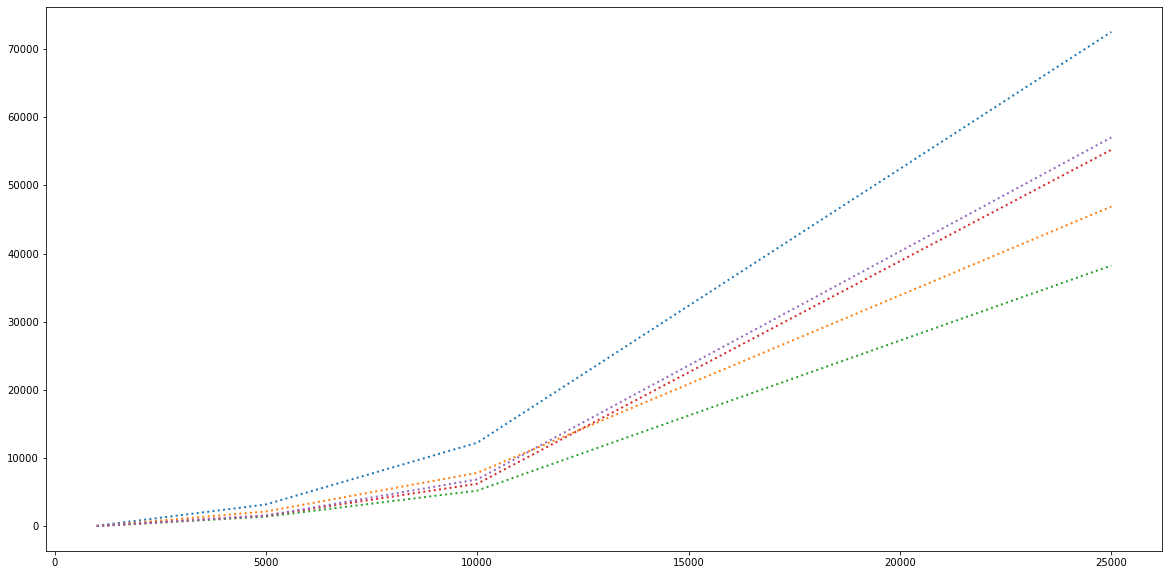

In [62]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(20,10))
dic1={}


#wc
for s in dt:
    t_v=tt[s]
    for w in workers:
        dic1[w]=dic1.get(w,[])
        dic1[w].append((float(t_v[w][0])))

        
    
for s in workers:
    x='dotted'    
    plt.plot(nodes, (dic1[s]),linestyle=x,linewidth=2,label='Communication time of PDGSD with 1 server with '+str(s)+'worker')


# total time taken for execution, scaled

In [63]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]

s1=10000
s2=30000
s3=45000
s4=65000
s5=75000

d1=10000
d2=20000
d3=30000
d4=40000
d5=50000

source_scale_1 = (s1, s2) # Scale values between 100 and 600
destination_scale_1 = (d1, d2) # to a scale between 100 and 150
source_scale_2 = (s2, s3) # Scale values between 100 and 600
destination_scale_2 = (d2, d3) # to a scale between 100 and 150
source_scale_3 = (s3, s4) # Scale values between 100 and 600
destination_scale_3 = (d3, d4) # to a scale between 100 and 150
source_scale_4 = (s4, s5) # Scale values between 100 and 600
destination_scale_4 = (d4, d5) # to a scale between 100 and 150

def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]
def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

<Figure size 720x504 with 0 Axes>

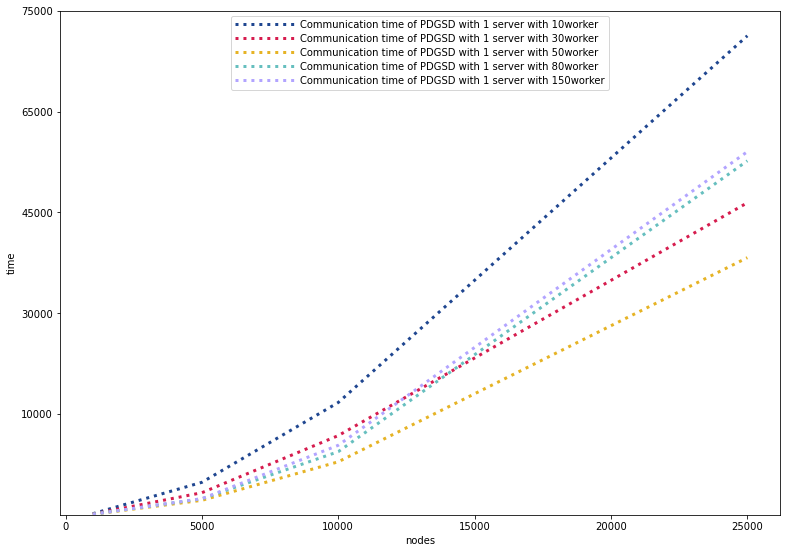

In [64]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,7))
dic1={}


#wc
for s in dt:
    t_v=tt[s]
    for w in workers:
        dic1[w]=dic1.get(w,[])
        dic1[w].append(float(t_v[w][0]))
# Set up a simple plot
fig = plt.figure(figsize=(10,7))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)

# Set the y-ticks to a custom scale
ax.set_yticks([d1,d2,d3,d4,d5])
ax.set_ylim(0, d5)
# Set the labels to the actual values
ax.set_yticklabels([s1,s2,s3,s4,s5])     
    
    
Colors={10:"#1F4690",30:"#D61C4E",50:"#E6B325",80:"#66BFBF",150:"#B2A4FF"}
for s in workers:
    x='dotted'    
    plt.plot(nodes, f11(dic1[s]),linestyle=x,linewidth=3,color=Colors[s],label='Communication time of PDGSD with 1 server with '+str(s)+'worker')


    
    


leg = plt.legend(loc='upper center',handlelength=6,labelspacing=0.4,fontsize=10,frameon = True,handletextpad=0.5,)

plt.title('')
plt.xlabel('nodes')
plt.ylabel('time')
plt.savefig('O1.jpg',bbox_inches='tight', dpi=150)
plt.show()


# Execution and communication time -scaled

In [65]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]

s1=10000
s2=30000
s3=45000
s4=65000
s5=75000

d1=10000
d2=20000
d3=30000
d4=40000
d5=50000

source_scale_1 = (s1, s2) # Scale values between 100 and 600
destination_scale_1 = (d1, d2) # to a scale between 100 and 150
source_scale_2 = (s2, s3) # Scale values between 100 and 600
destination_scale_2 = (d2, d3) # to a scale between 100 and 150
source_scale_3 = (s3, s4) # Scale values between 100 and 600
destination_scale_3 = (d3, d4) # to a scale between 100 and 150
source_scale_4 = (s4, s5) # Scale values between 100 and 600
destination_scale_4 = (d4, d5) # to a scale between 100 and 150

def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]
def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

<Figure size 720x504 with 0 Axes>

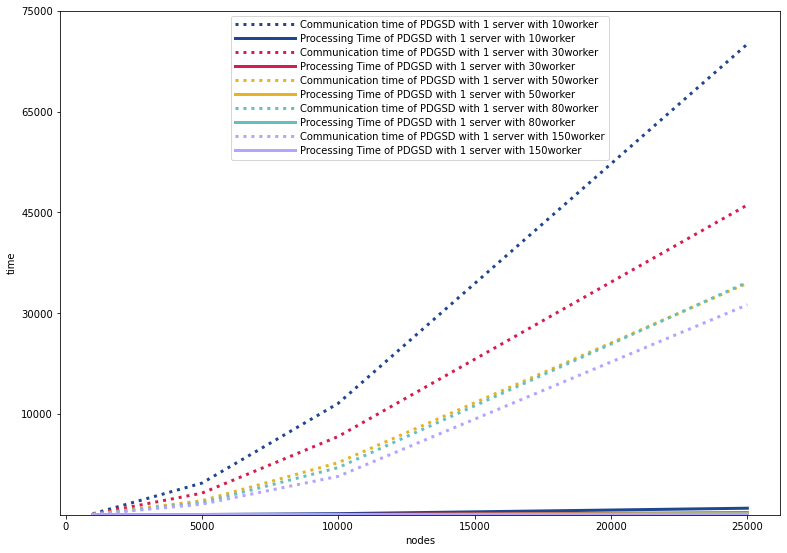

In [66]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,7))
dic1={}


# Set up a simple plot
fig = plt.figure(figsize=(10,7))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)

# Set the y-ticks to a custom scale
ax.set_yticks([d1,d2,d3,d4,d5])
ax.set_ylim(0, d5)
# Set the labels to the actual values
ax.set_yticklabels([s1,s2,s3,s4,s5])     
    

for s in dt:
    t_v=ct[s]
    for w in workers:
        dic1[w]=dic1.get(w,[])
        dic1[w].append(float(t_v[w][0]))
dic2={}

#wc
for s in dt:
    t_v=et[s]
    for w in workers:
        dic2[w]=dic2.get(w,[])
        dic2[w].append(float(t_v[w][0]))
        
Colors={10:"#1F4690",30:"#D61C4E",50:"#E6B325",80:"#66BFBF",150:"#B2A4FF"}
for s in workers:
    x='dotted'    
    plt.plot(nodes, f11(dic1[s]),linestyle=x,linewidth=3,color=Colors[s],label='Communication time of PDGSD with 1 server with '+str(s)+'worker')
    x=None
    plt.plot(nodes, f11(dic2[s]),linestyle=x,linewidth=3,color=Colors[s],label='Processing Time of PDGSD with 1 server with '+str(s)+'worker')

    
    


leg = plt.legend(loc='upper center',handlelength=6,labelspacing=0.4,fontsize=10,frameon = True,handletextpad=0.5,)

plt.title('')
plt.xlabel('nodes')
plt.ylabel('time')
plt.savefig('O2.jpg',bbox_inches='tight', dpi=150)
plt.show()


# Shwoign total time in another view

In [67]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]

s1=50
s2=500
s3=10000
s4=35000
s5=75000

d1=50
d2=2000
d3=5000
d4=7000
d5=10000

source_scale_1 = (s1, s2) # Scale values between 100 and 600
destination_scale_1 = (d1, d2) # to a scale between 100 and 150
source_scale_2 = (s2, s3) # Scale values between 100 and 600
destination_scale_2 = (d2, d3) # to a scale between 100 and 150
source_scale_3 = (s3, s4) # Scale values between 100 and 600
destination_scale_3 = (d3, d4) # to a scale between 100 and 150
source_scale_4 = (s4, s5) # Scale values between 100 and 600
destination_scale_4 = (d4, d5) # to a scale between 100 and 150

def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]
def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1

<Figure size 504x360 with 0 Axes>

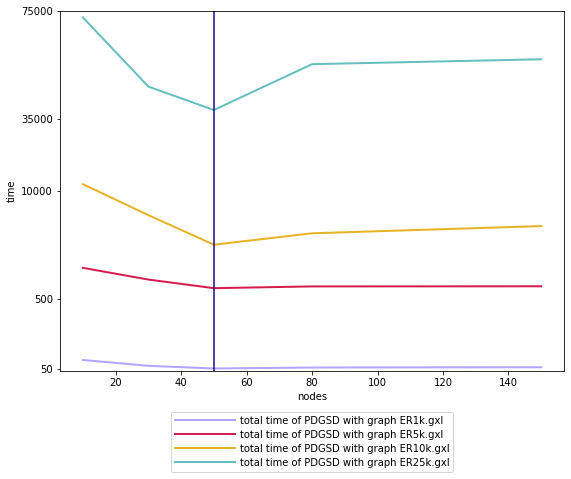

In [68]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

plt.figure(figsize=(7,5))
dic1={}

# Set up a simple plot
fig = plt.figure(figsize=(7,5))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)

# Set the y-ticks to a custom scale
ax.set_yticks([d1,d2,d3,d4,d5])
ax.set_ylim(0, d5)
# Set the labels to the actual values
ax.set_yticklabels([s1,s2,s3,s4,s5])   



dic={}
for x in dt:
    dic[x]=[]
    for y in workers:
        dic[x].append( ([float(x) for x in tt[x][y] ][0]) )
        
Colors=["#B2A4FF","#D61C4E","#E6B325","#66BFBF","#B2A4FF"]
for i,s in enumerate(dt):
    x=None   
    plt.plot(workers, f11(dic[s]),color=Colors[i],linestyle=x,linewidth=2,label='total time of PDGSD with graph '+str(s))

    
    

leg = plt.legend(loc='upper center',handlelength=6,bbox_to_anchor=(0.5,-0.1),labelspacing=0.4,fontsize=10,frameon = True,handletextpad=0.5,)
plt.title('')
plt.xlabel('nodes')
plt.ylabel('time')
plt.axvline(x=50, c='#1F0690')
plt.savefig('O3.jpg',bbox_inches='tight', dpi=150)
plt.show()

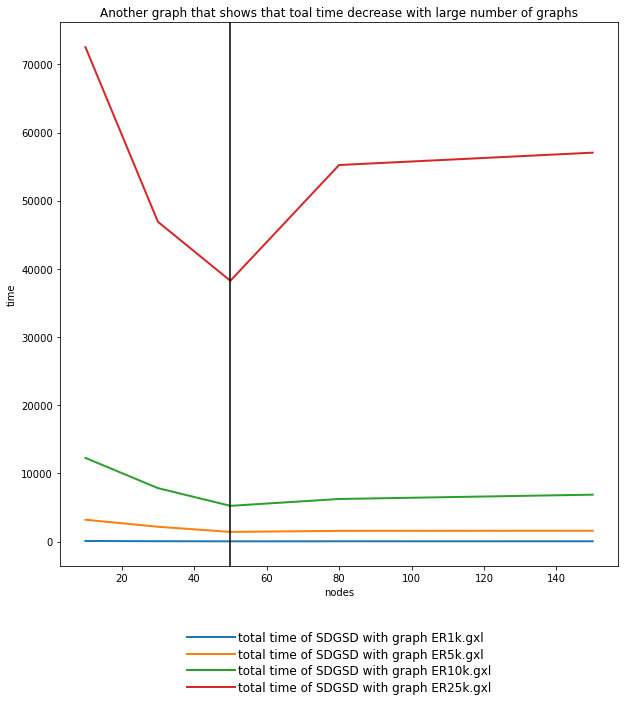

{'ER1k.gxl': [107.76, 70.42, 53.21, 59.53, 61.12],
 'ER5k.gxl': [3222.41, 2190.71, 1434.91, 1589.38, 1601.36],
 'ER10k.gxl': [12284.31, 7857.69, 5257.64, 6262.23, 6895.77],
 'ER25k.gxl': [72519.22, 46913.61, 38263.14, 55234.39, 57047.49]}

In [17]:
workers=[10,30,50,80,150]
nodes = [1000,5000,10000,25000]
dt=['ER1k.gxl','ER5k.gxl','ER10k.gxl','ER25k.gxl']

plt.figure(figsize=(10,10))
dic1={}


dic={}
for x in dt:
    dic[x]=[]
    for y in workers:
        dic[x].append( ([float(x) for x in tt[x][y] ][0]) )
dic




for s in dt:
    x=None   
    plt.plot(workers, dic[s],linestyle=x,linewidth=2,label='total time of SDGSD with graph '+str(s))

plt.axvline(x=50, c='k')
    
leg = plt.legend(loc='upper center',bbox_to_anchor=(0.5,-0.1),handlelength=4,labelspacing=0.3,fontsize=12,frameon = False,handletextpad=0.2,)
plt.title('Another graph that shows that toal time decrease with large number of graphs')
plt.xlabel('nodes')
plt.ylabel('time')
plt.show()
dic

ValueError: shape mismatch: objects cannot be broadcast to a single shape

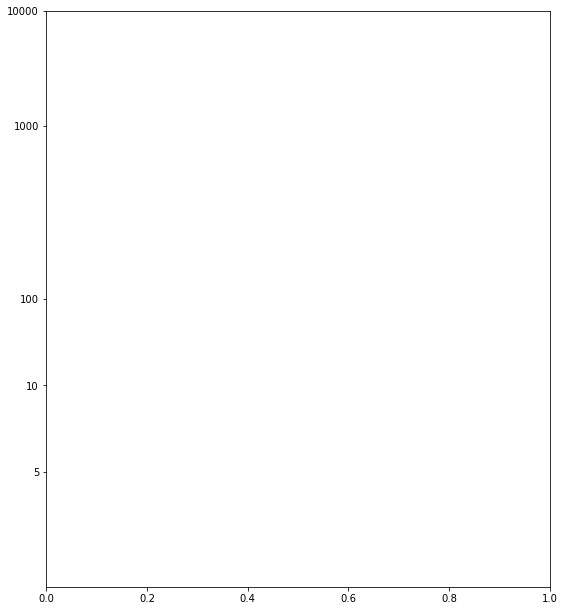

In [15]:
# Actual data
Netlsd=[28,145]
FGSD=[96,2800]
Netsimilie=[90,3200]
DGSD=[5,110]

def scale(val, src, dst):
        """
        Scale the given value from the scale of src to the scale of dst.
        """
        return ((val - src[0]) / (src[1]-src[0])) * (dst[1]-dst[0]) + dst[0]

s1=5
s2=10
s3=100
s4=1000
s5=10000

d1=20
d2=35
d3=50
d4=80
d5=100

source_scale_1 = (s1, s2) # Scale values between 100 and 600
destination_scale_1 = (d1, d2) # to a scale between 100 and 150
source_scale_2 = (s2, s3) # Scale values between 100 and 600
destination_scale_2 = (d2, d3) # to a scale between 100 and 150
source_scale_3 = (s3, s4) # Scale values between 100 and 600
destination_scale_3 = (d3, d4) # to a scale between 100 and 150
source_scale_4 = (s4, s5) # Scale values between 100 and 600
destination_scale_4 = (d4, d5) # to a scale between 100 and 150

def f11(data):
    l1=[]
    for x in data:
        if x < s1:
            l1.append(x)
        elif x<s2:
            l1.append(scale(x, source_scale_1, destination_scale_1) )
        elif x<s3: 
            l1.append(scale(x, source_scale_2, destination_scale_2))
        elif x<s4: 
            l1.append(scale(x, source_scale_3, destination_scale_3))
        else:
            l1.append(scale(x, source_scale_4, destination_scale_4))
    return l1
# Apply scale to all items of data that are above or equal to 100
data_scaled_Netlsd = f11(Netlsd)
data_scaled_FGSD = f11(FGSD)
data_scaled_DGSD =  f11(DGSD)
data_scaled_Netsimilie =  f11(Netsimilie)


# Set up a simple plot
fig = plt.figure(figsize=(7,8))
ax = plt.Axes(fig, [0.,0.,1.,1.])
fig.add_axes(ax)

# Set the y-ticks to a custom scale
ax.set_yticks([d1,d2,d3,d4,d5])
ax.set_ylim(0, d5)
# Set the labels to the actual values
ax.set_yticklabels([s1,s2,s3,s4,s5])

x_axis = np.arange(len(dt))

plt.bar(x_axis +0.2, data_scaled_DGSD, width=0.2, label = 'DGSD')
plt.bar(x_axis +0.2*2, data_scaled_Netlsd, width=0.2, label = 'Netlsd')
plt.bar(x_axis +0.2*3, data_scaled_FGSD, width=0.2, label = 'FGSD')
plt.bar(x_axis +0.2*4, data_scaled_Netsimilie, width=0.2, label = 'Netsimilie')


plt.xticks(x_axis, dt)

# Add legend

plt.legend()


plt.show()


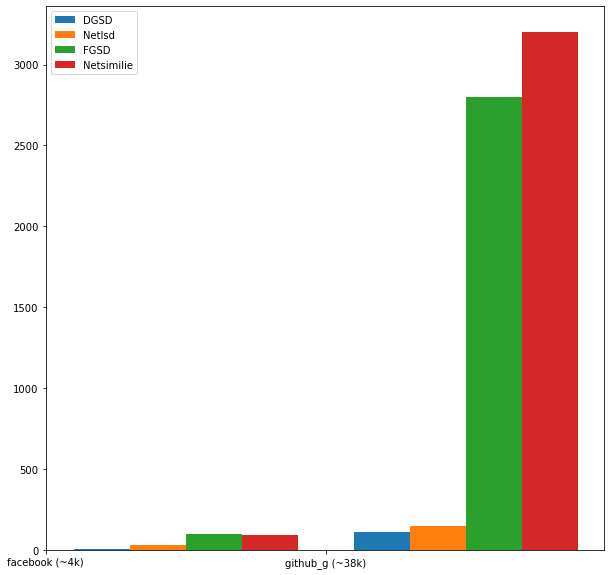

In [21]:
dt=['facebook (~4k)','github_g (~38k)']

plt.figure(figsize=(10,10))

Netlsd=[28,145]
FGSD=[96,2800]
Netsimilie=[90,3200]
DGSD=[5,110]

x_axis = np.arange(len(dt))

plt.bar(x_axis +0.2, DGSD, width=0.2, label = 'DGSD')
plt.bar(x_axis +0.2*2, Netlsd, width=0.2, label = 'Netlsd')
plt.bar(x_axis +0.2*3, FGSD, width=0.2, label = 'FGSD')
plt.bar(x_axis +0.2*4, Netsimilie, width=0.2, label = 'Netsimilie')


plt.xticks(x_axis, dt)

# Add legend

plt.legend()

# Display

plt.show()

In [ ]:
import matplotlib.pyplot as plt
axes = plt.axes()
axes.set_xlim([-10, 10]) #whatever, optional
axes.set_ylim([0, 1.0]) # whatever, optional
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
axes.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,150,200,300])
plt.plot(x, norm.pdf(x)) #random filler
plt.plot(x, norm.pdf(x, 70.0, 0.1)) #another absolutely random filler
plt.show()

In [ ]:
tt_2_10=[29.24]
tt_2_20=[18.15]
tt_2_30=[16.24]
tt_2_50=[14.28]
tt_2_100=[13.51]
tt_2_200=[14.53]

pa_2_10=[22.3]
pa_2_20=[13.3]
pa_2_30=[11.7]
pa_2_50=[9.4]
pa_2_100=[8.6]
pa_2_200=[8.9]

wp_2_10=[0.67]
wp_2_20=[0.40]
wp_2_30=[0.36]
wp_2_50=[0.35]
wp_2_100=[0.31]
wp_2_200=[0.35]

sp_2_10=[3.06]
sp_2_20=[1.68]
sp_2_30=[1.60]
sp_2_50=[1.63]
sp_2_100=[1.42]
sp_2_200=[0.69]

wc_2_10=[25.4]
wc_2_20=[14.9]
wc_2_30=[13.3]
wc_2_50=[11.1]
wc_2_100=[10.1]
wc_2_200=[9.6]

In [ ]:
tc={}
wc={}
sp={}
wp={}
pa={}
tt={}

In [ ]:
def pri(s):
    tc[s]={}
    wc[s]={}
    sp[s]={}
    wp[s]={}
    pa[s]={}
    tt[s]={}

def pri2(s,w):
    tc[s][w]=[]
    wc[s][w]=[]
    sp[s][w]=[]
    wp[s][w]=[]
    pa[s][w]=[]
    tt[s][w]=[]
    
def pri3(s,w,f,c):
    if(c==1):
        tc[s][w].append(f[0])
    elif(c==2):
        wc[s][w].append(f[0])
    elif(c==3):
        sp[s][w].append(f[0])
    elif(c==4):
        wp[s][w].append(f[0])
    elif(c==5):
        pa[s][w].append(f[0])
    elif(c==6):
        tt[s][w].append(f[0])

In [ ]:
def readfile1(str1):
    f = open(str1, "r")
    s=0
    w=0
    counter=0
    for l in f.readlines():
        counter=counter+1
        if("S=2" in l):
            s=2
            pri(s)
            continue
        elif("S=3" in l):
            s=3
            pri(s)
            continue
        elif("S=4" in l):
            s=4
            pri(s)
            continue
        elif("S=6" in l):
            s=6
            pri(s)
            continue
        elif("S=8" in l):
            s=8
            pri(s)
            continue
        elif(s==0):
            continue

        if("W=00" in l):

            w=10
            pri2(s,w)
            counter=0
            continue
        elif("W=10F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=20
            pri2(s,w)
            counter=0
            continue
        elif("W=20F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=30
            pri2(s,w)
            counter=0
            continue
        elif("W=30F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=50
            pri2(s,w)
            counter=0
            continue
        elif("W=50F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=100
            pri2(s,w)
            counter=0
            continue
        elif("W=100F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            w=200
            pri2(s,w)
            counter=0
            continue
        elif("W=200F" in l):

            pri3(s,w,re.findall("\d+\.\d+", l),counter)
            counter=0
            continue
        elif(w==0):
            counter=0
            continue
        
        if(s!=0 and w!=0):
            pri3(s,w,re.findall("\d+\.\d+", l),counter)



In [ ]:
#readfile1("./test_text/d1.txt")
readfile1("./d1.txt")

In [ ]:
wc

In [ ]:
def pri(s):
    return

def pri2(s,w):
    return
    

In [ ]:
readfile1("./d2.txt")

In [ ]:
readfile1("./d3.txt")

In [ ]:
wc

In [ ]:
tc={}
wc={}
sp={}
wp={}
pa={}
tt={}

In [ ]:
#communication
servers=[2]
workers=[10,20,30,50,100,200]

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,10))

#wc
for s in servers:
    t_v=tt[s]
    if(s==2):
        x='-.'
        y='red'
    else:
        x='solid'
        y='green'
    for w in workers:
        plt.plot(nodes, [float(item) for item in t_v[w]],linestyle=x,linewidth=2,label=str(s)+'server'+str(w)+'worker')
        print([float(item) for item in t_v[w]])
leg = plt.legend(loc='upper center')
plt.title('nodes vs time')
plt.xlabel('nodes')
plt.ylabel('time')
plt.show()

In [ ]:
#communication
servers=[2]
workers=[10,20,30,50,100,200]

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,10))

#wc
for s in servers:
    t_v=sp[s]
    if(s==2):
        x='-.'
        y='red'
    else:
        x='solid'
        y='green'
    for w in workers:
        plt.plot(nodes, [float(item) for item in t_v[w]],linestyle=x,linewidth=2,label=str(s)+'server'+str(w)+'worker')
        print([float(item) for item in t_v[w]])
leg = plt.legend(loc='upper center')
plt.title('nodes vs time')
plt.xlabel('nodes')
plt.ylabel('time')
plt.show()

In [ ]:
#communication
servers=[2]
workers=[10,20,30,50,100,200]

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,10))

#wc
for s in servers:
    t_v=wc[s]
    if(s==2):
        x='-.'
        y='red'
    else:
        x='solid'
        y='green'
    for w in workers:
        plt.plot(nodes, [float(item) for item in t_v[w]],linestyle=x,linewidth=2,label=str(s)+'server'+str(w)+'worker')
        print([float(item) for item in t_v[w]])
leg = plt.legend(loc='upper center')
plt.title('nodes vs time')
plt.xlabel('nodes')
plt.ylabel('time')
plt.show()

In [ ]:
wc={}
sp={}
wp={}
pa={}
tt={}

In [ ]:
servers=[3]
workers=[10,20,30,50]

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,10))

#wc
for s in servers:
    t_v=wc[s]
    if(s==2):
        x='-.'
        y='red'
    else:
        x='solid'
        y='green'
    for w in workers:
        plt.plot(nodes, [float(item) for item in t_v[w]],linestyle=x,linewidth=2,label=str(s)+'server'+str(w)+'worker')
        print([float(item) for item in t_v[w]])
leg = plt.legend(loc='upper center')
plt.title('nodes vs time')
plt.xlabel('nodes')
plt.ylabel('time')
plt.show()

In [ ]:
servers=[2]
workers=[10,20,30,50,100]

#plt.plot(nodes, tt[2][10],color='red',linestyle='-.', marker='o',linewidth=2,label=w)
plt.figure(figsize=(10,10))

#wc
for s in servers:
    t_v=wp[s]
    if(s==2):
        x='-.'
        y='red'
    else:
        x='solid'
        y='green'
    for w in workers:
        plt.plot(nodes, [float(item) for item in t_v[w]],linestyle=x,linewidth=2,label=str(s)+'server'+str(w)+'worker')
        print([float(item) for item in t_v[w]])
leg = plt.legend(loc='upper center')
plt.title('nodes vs time')
plt.xlabel('nodes')
plt.ylabel('time')
plt.show()

In [ ]:
t1=1
m=32
worker_index=(range(0+ t1*32, m+t1*32))
[*a]

In [ ]:
import pickle
message = pickle.dumps([])
msg_length = len(message)

In [ ]:
batches = np.array_split([1,2,3,4,5,6,7,8], 2)

In [ ]:
np.array_split(batches[0],2)

# NX

In [524]:
import networkx as nx
from torch_geometric.datasets import TUDataset,MoleculeNet
from torch_geometric.utils.convert import to_networkx
import networkx as nx
import pandas as pd

_name_dt=['PROTEINS','NCI109','NCI1','DD','REDDIT-BINARY','REDDIT-MULTI-5K']

hist={}
for name_dt in _name_dt:

    Mutag = TUDataset(root='./N_'+name_dt, name=name_dt)
    for i in range(0,len(Mutag)):
        graph=to_networkx(Mutag[i])
        n = nx.all_pairs_shortest_path_length(graph)
        n=dict(n)
        #print(n)
        for key,val in n.items():
            #print(val)
            for k2,v2 in val.items():
                #print(k2)
                t=hist.get((v2),0)
                hist[(v2)]=t+1
    df=pd.DataFrame({'x':list(hist.keys()),'y':list(hist.values())})

    fig, ax = plt.subplots(figsize =(5, 5))
    Colors={10:"#1F4690",30:"#D61C4E",50:"#E6B325",80:"#66BFBF",150:"#2C3639"}
    try:
        plt.plot(df[:30]['x'],df[:30]['y'],marker='o',color=Colors[10])
    except:
        plt.plot(df[:20]['x'],df[:20]['y'],marker='o',color=Colors[10])
    plt.axvline(x=5, c=Colors[50])
    plt.axvline(x=4, c=Colors[30])
    plt.axvline(x=3, c=Colors[80])
    #plt.axvline(x=2, c='#61481C')
    ax.set_xticks([1,3,4,5,10,20,30])
    # Show plot
    print("3",df[0:3]['y'].sum()/df['y'].sum())
    print("4",df[0:4]['y'].sum()/df['y'].sum())
    print("5",df[0:5]['y'].sum()/df['y'].sum())
    print("6",df[0:6]['y'].sum()/df['y'].sum())
    prtin("max",df[0:df['y'].idxmax()]['y'].sum()/df['y'].sum())
     

    plt.title(name_dt)
    plt.xlabel('Lenght of Shortest Distances (Hops)')
    plt.ylabel('# of Pairs')
    plt.savefig(name_dt+'.jpg',bbox_inches='tight', dpi=150)
    plt.show()
        #n = (np.where(distances==2))
        #n=nx.all_pairs_shortest_path_length(graph)


SyntaxError: unexpected character after line continuation character (Temp/ipykernel_2572/2987221669.py, line 19)

In [517]:
import pandas as pd

In [549]:
df[0:df['y'].idxmax()]['y'].sum()/df['y'].sum()

0.16313677314759456

In [543]:
df.head(10)

,x,y
0,0,288712
1,1,692802
2,2,993964
3,3,1104746
4,4,1090928
5,5,1043158
6,6,974378
7,7,881916
8,8,775020
9,9,664514


0.16313677314759456

In [352]:
G = nx.Graph()

In [354]:
nx.add_path(G, [0, 1, 2])

In [355]:
nx.add_path(G, [0, 10, 2])

In [367]:
print(([p for p in nx.all_pairs_shortest_path_length(G)][3][1]))

{10: 0, 0: 1, 2: 1, 1: 2}
